In [117]:
%pylab inline
%load_ext autoreload
%autoreload 2

from __future__ import division

import copy
import os
import argparse
import numpy as np

# Astropy related
from astropy.io import fits

# Matplotlib default settings
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 12, 10
mpl.rcParams['xtick.major.size'] = 8.0
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 4.0
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 8.0
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 4.0
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rc('axes', linewidth=2)

# Shapely related imports
from shapely.geometry import Polygon, LineString, Point
from shapely          import wkb
from shapely.ops      import cascaded_union

# Personal codes
from coaddPatchShape import polyReadWkb

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [122]:
inCat = '/home/song/work/hs_hsc/py/data/test_extra_cat.fits'
acpMask = '/home/song/work/hs_hsc/py/ipynb/ssp341_cosmos_HSC-I_corners.wkb'
rejMask = '/home/song/work/hs_hsc/py/ipynb/ssp341_cosmos_0_HSC-I_nodata_big.wkb'

In [123]:
catHdu = fits.open(inCat)
catData = catHdu[1].data

In [124]:
raArr = catData.field('RA')
decArr = catData.field('DEC')

In [125]:
acpRegs = polyReadWkb(acpMask)
rejRegs = polyReadWkb(rejMask)

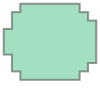

In [126]:
acpRegs

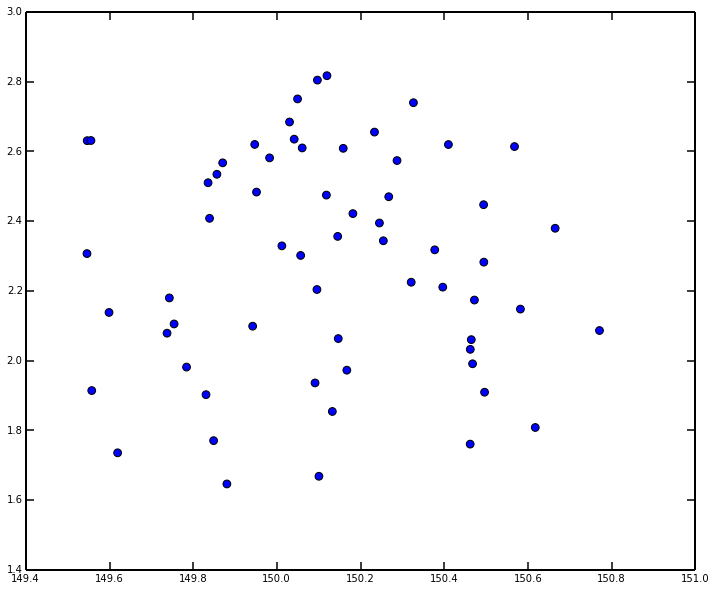

In [127]:
plt.scatter(raArr, decArr, s=60)

In [128]:
inside = map(lambda x, y: acpRegs.contains(Point(x, y)), raArr, decArr)

In [129]:
masked = map(lambda x, y: rejRegs.contains(Point(x, y)), raArr, decArr)

In [130]:
useful = map(lambda x, y: x and (not y), inside, masked)

In [131]:
matched = catData[np.asarray(useful)]

In [132]:
from astropy.table import Table
tab = Table.read(inCat, format='fits')

In [133]:
mat = tab[np.asarray(useful)]

In [134]:
os.path.splitext(inCat)[0]

'/home/song/work/hs_hsc/py/data/test_extra_cat'

In [135]:
raCol = np.asarray(map(lambda x: x == 'RA', cols))

In [136]:
len(mat)

62

In [137]:
len(catData)

62

In [138]:
acpRange= []
acpRange.append(acpRegs.bounds)

In [139]:
acpRange

[(149.05804443359375,
  1.3603771924972534,
  151.1132049560547,
  3.0496742725372314)]

In [140]:
from numpy.random import uniform 
raRand = uniform(low=148.0, high=151.5, size=200)
decRand = uniform(low=1.30, high=3.20, size=200)

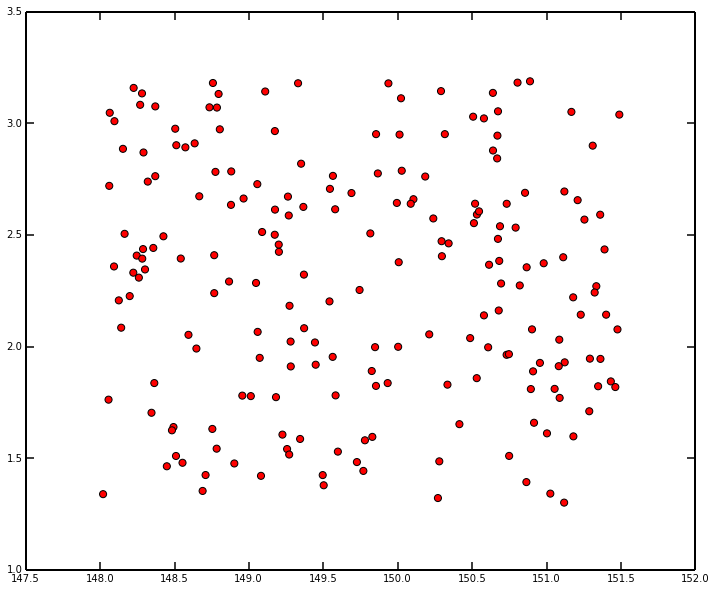

In [141]:
plt.scatter(raRand, decRand, s=50, c='r')

In [142]:
import time 
start = time.clock()

rejComb = cascaded_union(rejRegs)
inside = map(lambda x, y: acpRegs.contains(Point(x, y)), raRand, decRand)
masked = map(lambda x, y: rejComb.contains(Point(x, y)), raRand, decRand)
useful = map(lambda x, y: x and (not y), inside, masked)

elapsed = (time.clock() - start)
print("Time used:",elapsed)

('Time used:', 0.21000000000003638)


In [143]:
matched = raRand[np.asarray(useful)]
print len(matched)

64
